In [53]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import validation_curve
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns


In [42]:
df = pd.read_csv(r"C:\Users\adith\OneDrive\Desktop\Adithya\My Projects\Linear Reg\digit_svm.csv")
df

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [43]:
train_data = df.iloc[:, 0:] #reading the csv files using pandas
test_data = df.iloc[:,1:]
train_data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [44]:
df.isnull().sum()

label       0
pixel0      0
pixel1      0
pixel2      0
pixel3      0
           ..
pixel779    0
pixel780    0
pixel781    0
pixel782    0
pixel783    0
Length: 785, dtype: int64

In [45]:
print("Dimensions: ",test_data.shape, "\n")

Dimensions:  (42000, 784) 



In [46]:
print(train_data.columns)
print(test_data.columns)


Index(['label', 'pixel0', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5',
       'pixel6', 'pixel7', 'pixel8',
       ...
       'pixel774', 'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779',
       'pixel780', 'pixel781', 'pixel782', 'pixel783'],
      dtype='object', length=785)
Index(['pixel0', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5', 'pixel6',
       'pixel7', 'pixel8', 'pixel9',
       ...
       'pixel774', 'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779',
       'pixel780', 'pixel781', 'pixel782', 'pixel783'],
      dtype='object', length=784)


In [47]:
order = list(np.sort(train_data['label'].unique()))
print(order)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


Text(0.5, 1.0, 'Digit 4')

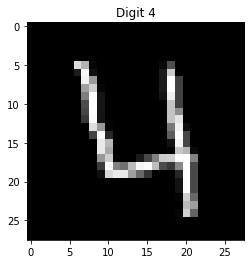

In [48]:
four = train_data.iloc[3, 1:]
four.shape
four = four.values.reshape(28,28)
plt.imshow(four, cmap='gray')
plt.title("Digit 4")

Text(0.5, 1.0, 'Digit 7')

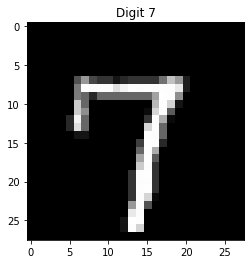

In [49]:
seven = train_data.iloc[6, 1:]
seven.shape
seven = seven.values.reshape(28, 28)
plt.imshow(seven, cmap='gray')
plt.title("Digit 7")

In [50]:
round(train_data.drop('label', axis=1).mean(), 2)

pixel0      0.0
pixel1      0.0
pixel2      0.0
pixel3      0.0
pixel4      0.0
           ... 
pixel779    0.0
pixel780    0.0
pixel781    0.0
pixel782    0.0
pixel783    0.0
Length: 784, dtype: float64

In [28]:
## Separating the X and Y variable

y = train_data['label']

## Dropping the variable 'label' from X variable 
X = train_data.drop(columns = 'label')

## Printing the size of data 
print(train_data.shape)

(42000, 785)


In [32]:
X = X/255.0
test_data = test_data/255.0

print("X:", X.shape)
print("test_data:", test_data.shape)

X: (42000, 784)
test_data: (42000, 784)


In [38]:
# scaling the features
from sklearn.preprocessing import scale
X_scaled = scale(X)

# train test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.3, train_size = 0.2 ,random_state = 10)

In [39]:
model_linear = SVC(kernel='linear')
model_linear.fit(X_train, y_train)

# predict
y_pred = model_linear.predict(X_test)

In [40]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix
# accuracy
print("accuracy:", metrics.accuracy_score(y_true=y_test, y_pred=y_pred), "\n")

# cm
print(metrics.confusion_matrix(y_true=y_test, y_pred=y_pred))

accuracy: 0.9133333333333333 

[[1160    0    0    1    6    6   12    1    1    1]
 [   0 1389    3    4    3    0    0    2   12    0]
 [   9   11 1146   38   11    4   10   12   17    2]
 [   5    4   35 1204    0   51    2    3   21    6]
 [   3    3   20    3 1132    1   10    4    2   40]
 [   9   17   10   67    7  997   14    2   19    7]
 [  15    2   15    0    9   15 1160    1    2    0]
 [   5   12   18    9   26    2    1 1212    3   42]
 [   8   31   24   45    8   61    9   14 1002   15]
 [   9    6    7   28   56    3    0   53    7 1106]]


In [36]:
# model
non_linear_model = SVC(kernel='rbf')

# fit
non_linear_model.fit(X_train, y_train)

# predict
y_pred = non_linear_model.predict(X_test)

In [37]:
# confusion matrix and accuracy

# accuracy
print("accuracy:", metrics.accuracy_score(y_true=y_test, y_pred=y_pred), "\n")

# cm
print(metrics.confusion_matrix(y_true=y_test, y_pred=y_pred))

accuracy: 0.9348412698412698 

[[1156    0    5    1    0    2   12    6    5    1]
 [   0 1389    4    3    4    0    2    6    5    0]
 [   2    4 1170   19    5    0    9   35   15    1]
 [   1    4   19 1237    0   20    2   32   13    3]
 [   0    4   25    0 1133    0    9   17    3   27]
 [   1    9    5   42    3 1047   17   11    8    6]
 [  13    2    5    0    2   15 1156   24    2    0]
 [   3   10    9    3   15    0    0 1256    1   33]
 [   5   19   14   25    7   21    8   15 1095    8]
 [   4    4    6   30   23    2    1   61    4 1140]]
